In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters as filters

In [2]:
import h5py

f = h5py.File("chuyu_pattern.h5", "r")
image = (np.array(f["image"])/20).astype(np.uint8)

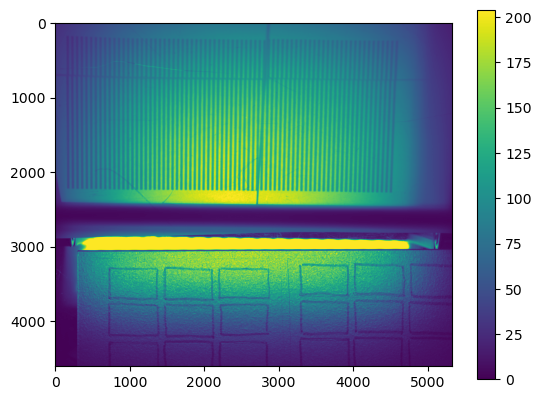

In [3]:
plt.imshow(image)
plt.colorbar()

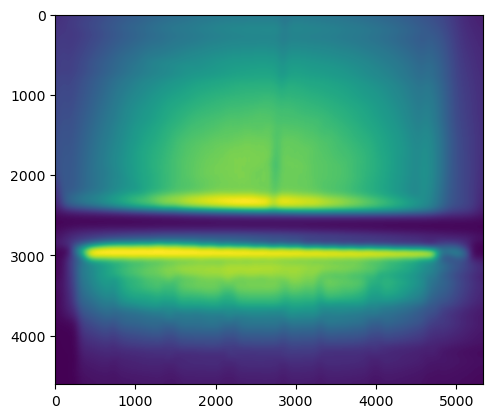

In [4]:
# blur
smooth = cv2.GaussianBlur(image, (333,333), 0)
plt.imshow(smooth)

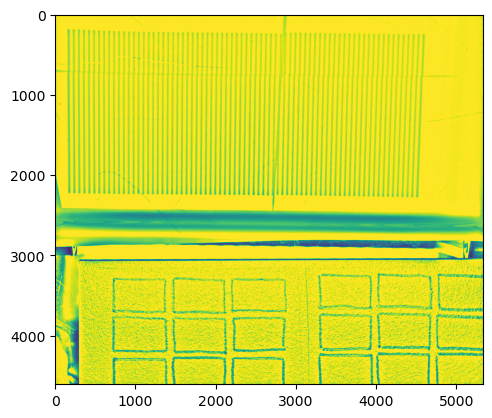

In [5]:

# divide gray by morphology image
division = cv2.divide(image, smooth, scale=255)

plt.imshow(division)

In [6]:
# sharpen using unsharp masking
sharp = filters.unsharp_mask(division, radius=30, amount=2.5, preserve_range=False)
sharp = (255*sharp).clip(0,255).astype(np.uint8)

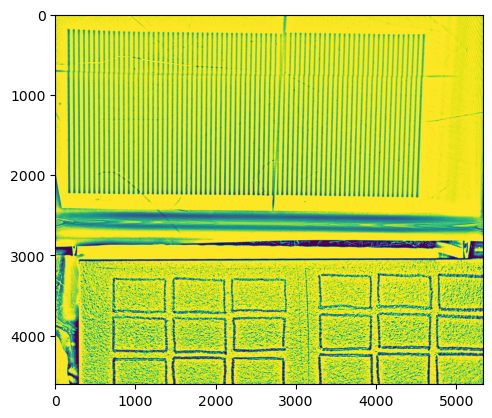

In [7]:
plt.imshow(sharp)

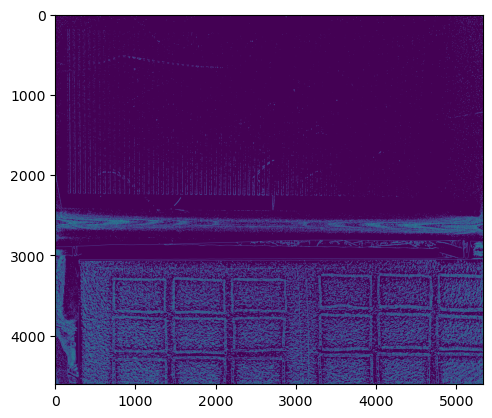

In [8]:
edges = cv2.Canny(sharp, 200, 250)
plt.imshow(edges)

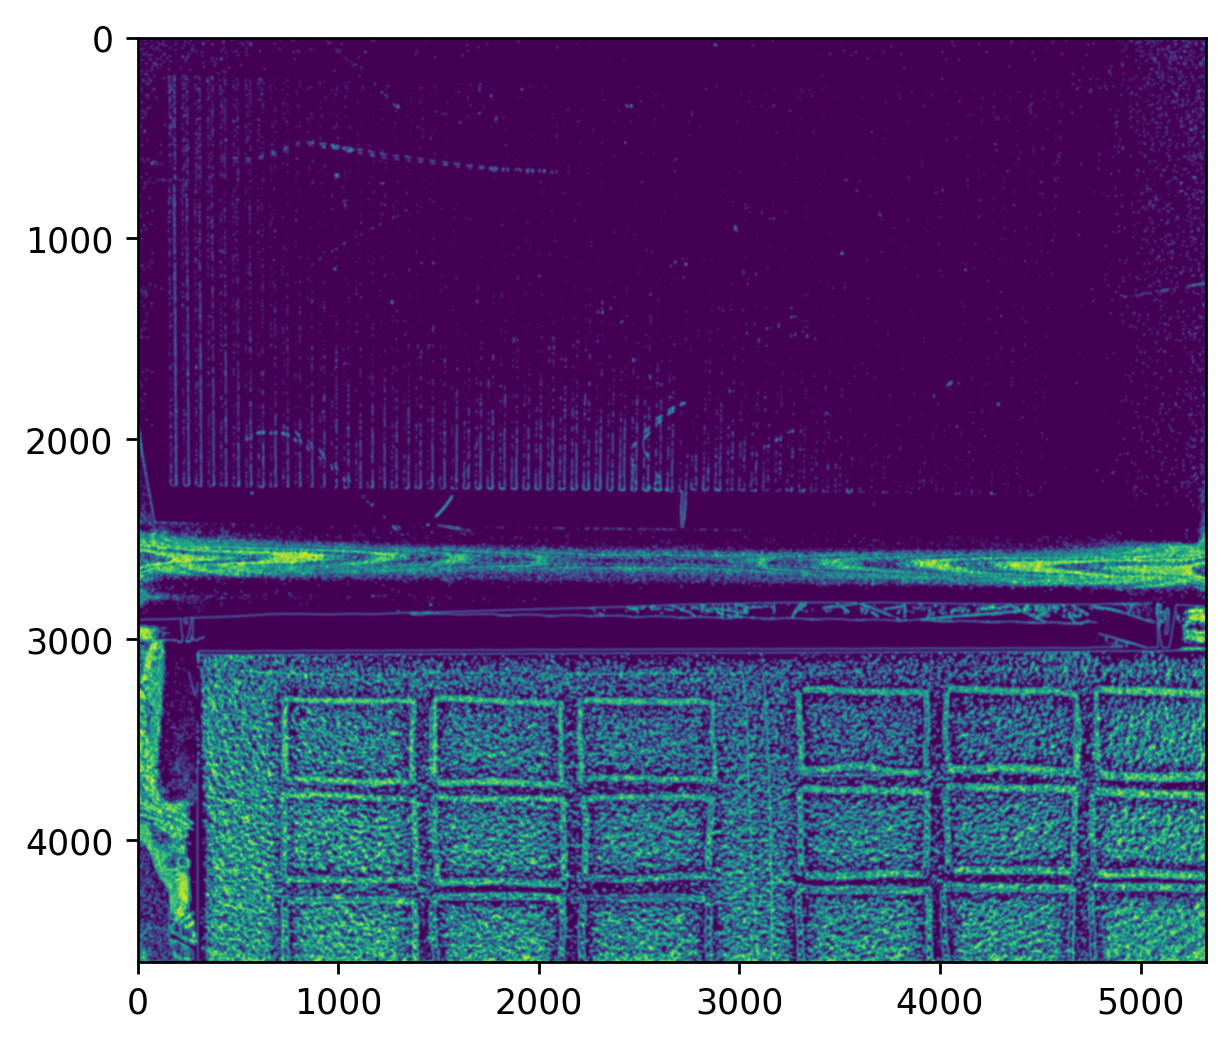

In [9]:

edged = cv2.GaussianBlur(edges, (31, 31), 0)
plt.figure(dpi=250)
plt.imshow(edged)
plt.show()
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts[0], key = cv2.contourArea, reverse = True)[:5]


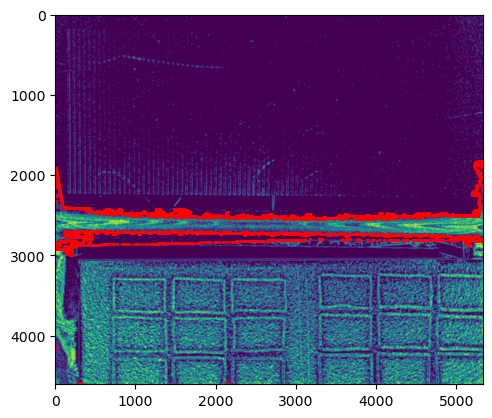

In [10]:
which_contour = 0
contour_x = cnts[which_contour][:,0,0]
contour_y = cnts[which_contour][:,0,1]


plt.imshow(edged)
plt.scatter(contour_x,contour_y, s= 1, color="r")





<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
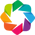

In [11]:
import numpy as np
import holoviews as hv
from holoviews import opts
from holoviews import streams
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt


hv.extension('bokeh')

In [12]:
import os
os.getcwd()

'/home/chuyu/projector'

In [13]:
%matplotlib inline

# Mark points

In [15]:
subsampled_array = np.copy(image[::4,::4])
img = hv.Image((range(subsampled_array.shape[1]), range(subsampled_array.shape[0]), subsampled_array))
points = hv.Points([]).opts(width=500, height=500, responsive=False, padding=0)

points_annotator = hv.annotate.instance()

img.opts(cmap="viridis")
points = img*points

points_annotator(points)

:Layout
   .DynamicMap.I             :DynamicMap   []
      :Overlay
         .Image.I  :Image   [x,y]   (z)
         .Points.I :Points   [x,y]
   .Annotator.PointAnnotator :Overlay
      .Table.PointAnnotator :Table   [x,y]

In [99]:
# points_annotator.annotated.dframe()


In [98]:
# the_point = points_annotator.annotated.iloc[-1].dframe().to_numpy()[0]
# the_point*=4
# the_point

In [16]:
rect = np.array([
    [39.648783322328036, 558.3440697018577], 
    [38.72953061945101, 47.4511609032389],
    [1131.9637367275566, 570.397460265175],
    [1152.7965411951939, 64.5208575076803],
    
]) *4

In [17]:
f2 = h5py.File("surface_array_1920_1080.h5", "r")
image_dmd = (np.array(f2["data"])).astype(np.uint8)

In [18]:
image_dmd.shape

(1080, 1920, 3)

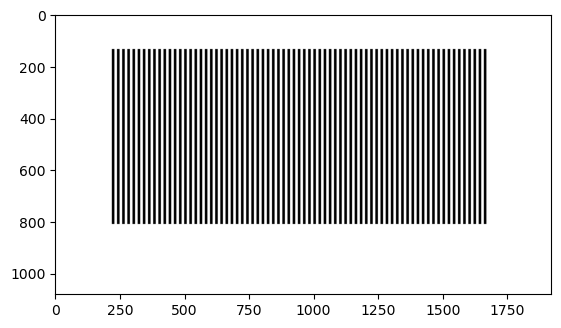

In [19]:
plt.imshow(image_dmd)

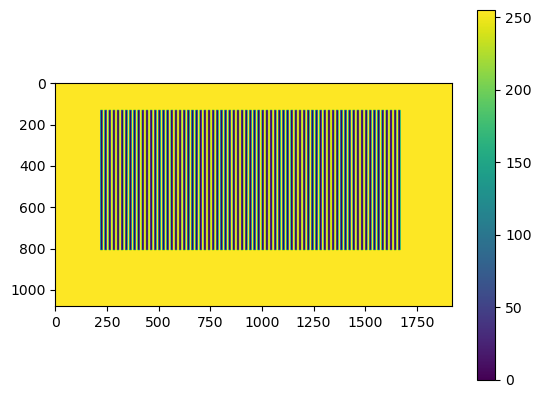

In [101]:
plt.imshow(image_dmd[:,:,0])
plt.colorbar()

roi_y, roi_x = np.where(image_dmd[:,:,0] < 100)

In [102]:
min_x = np.min(roi_x)
max_x = np.max(roi_x)
min_y = np.min(roi_y)
max_y = np.max(roi_y)

In [103]:
max_y

809

In [104]:
x1 = max_x
y1 = min_y

x2 = max_x
y2 = max_y

x3 = min_x
y3 = min_y

x4 = min_x
y4 = max_y

In [105]:
rect

array([[ 158.59513329, 2233.37627881],
       [ 154.91812248,  189.80464361],
       [4527.85494691, 2281.58984106],
       [4611.18616478,  258.08343003]])

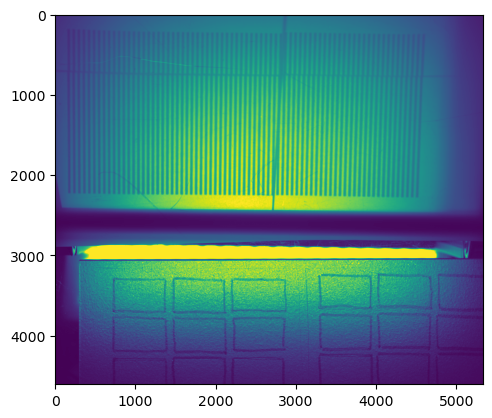

In [106]:
plt.imshow(image)

In [107]:
X1 = rect[0,0]
Y1 = rect[0,1]

X2 = rect[1,0]
Y2 = rect[1,1]

X3 = rect[2,0]
Y3 = rect[2,1]

X4 = rect[3,0]
Y4 = rect[3,1]

In [108]:
x_all = np.array([
    [x1, y1],
    [x2, y2],
    [x3, y3],
    [x4, y4],
]).T

X_all = np.array([
    [X1, Y1],
    [X2, Y2],
    [X3, Y3],
    [X4, Y4],
]).T

In [109]:
x_all_plusone = np.vstack([x_all, np.ones((1, x_all.shape[1]))])
X_all_plusone = np.vstack([X_all, np.ones((1, X_all.shape[1]))])

# Least square approach

In [110]:
A = np.array([
    [x1, y1, 1, 0, 0, 0, 0, 0, -X1, 0, 0, 0],
    [0, 0, 0, x1, y1, 1, 0, 0, -Y1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, x1, y1, -1, 0, 0, 0],
    [x2, y2, 1, 0, 0, 0, 0, 0, 0, -X2, 0, 0],
    [0, 0, 0, x2, y2, 1, 0, 0, 0, -Y2, 0, 0],
    [0, 0, 0, 0, 0, 0, x2, y2, 0, -1, 0, 0],
    [x3, y3, 1, 0, 0, 0, 0, 0, 0, 0, -X3, 0],
    [0, 0, 0, x3, y3, 1, 0, 0, 0, 0, -Y3, 0],
    [0, 0, 0, 0, 0, 0, x3, y3, 0, 0, -1, 0],
    [x4, y4, 1, 0, 0, 0, 0, 0, 0, 0, 0, -X4],
    [0, 0, 0, x4, y4, 1, 0, 0, 0, 0, 0, -Y4],
    [0, 0, 0, 0, 0, 0, x4, y4, 0, 0, 0, -1],
])

b = np.array([
    0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0, -1
])

In [111]:
A.shape

(12, 12)

In [112]:
params, _, _, _ = np.linalg.lstsq(A, b)

/tmp/ipykernel_2584170/4116921136.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params, _, _, _ = np.linalg.lstsq(A, b)


In [113]:
A00, A01, b0, A10, A11, b1, h0, h1, w0, w1, w2, w3 = params

In [114]:
M = np.array([
    [A00, A01, b0],
    [A10, A11, b1],
    [h0, h1, 1]
])

In [115]:
X_all_estimated_ = M@x_all_plusone

In [116]:
X_all_estimated_

array([[1.56312739e+02, 1.49680999e+02, 4.50397929e+03, 4.49734755e+03],
       [2.20123503e+03, 1.83388155e+02, 2.26955888e+03, 2.51711998e+02],
       [9.85608677e-01, 9.66194248e-01, 9.94726938e-01, 9.75312509e-01]])

In [117]:
X_all_estimated = X_all_estimated_[0:2,:]/X_all_estimated_[2,:]

In [118]:
X_all_estimated

array([[ 158.59513289,  154.91812236, 4527.85494606, 4611.18616341],
       [2233.37627325,  189.80464347, 2281.58984063,  258.08342995]])

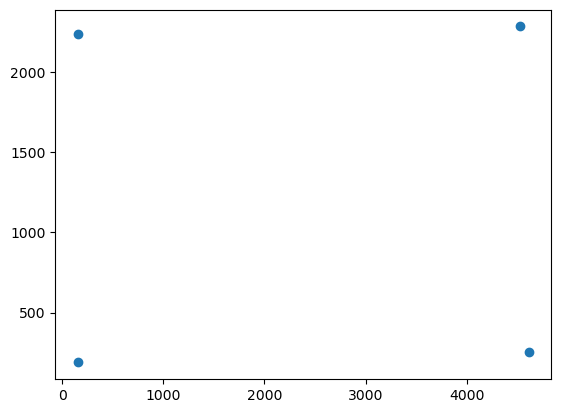

In [119]:
plt.scatter(X_all_estimated[0,:],X_all_estimated[1,:])

In [120]:
X_all

array([[ 158.59513329,  154.91812248, 4527.85494691, 4611.18616478],
       [2233.37627881,  189.80464361, 2281.58984106,  258.08343003]])

In [121]:
W = 1920
H = 1080
y_grid, x_grid = np.meshgrid(np.arange(H), np.arange(W))

In [122]:
x_grid.reshape(-1,)

array([   0,    0,    0, ..., 1919, 1919, 1919])

In [123]:
y_grid.reshape(-1,)

array([   0,    1,    2, ..., 1077, 1078, 1079])

In [124]:
x_gird_plusone = np.vstack([x_grid.reshape(-1,), y_grid.reshape(-1,), np.ones((1, len(y_grid.reshape(-1,))))])

In [125]:
X_gird = M@x_gird_plusone

In [126]:
X_gird = np.floor(X_gird[0:2,:]/X_gird[2,:]).astype(int)

In [127]:
X_gird.shape

(2, 2073600)

(-95.95, 2014.95, -53.95, 1132.95)

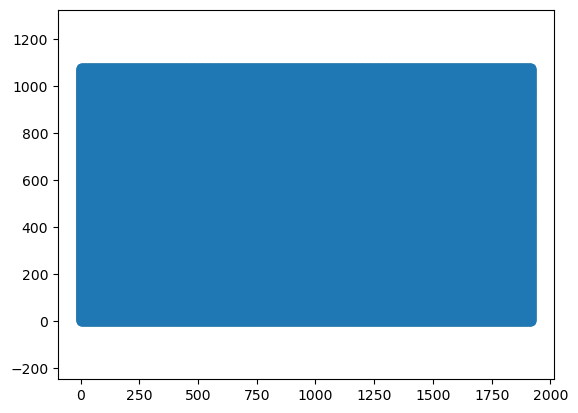

In [128]:
plt.scatter(x_grid, y_grid, alpha=0.1)
plt.axis("equal")

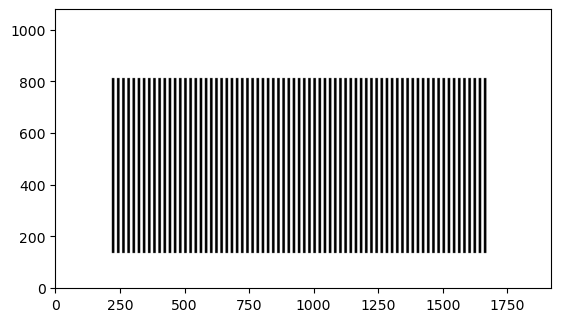

In [129]:
plt.imshow(image_dmd, origin="lower")

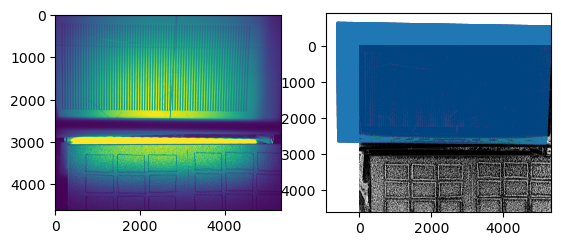

In [130]:
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(edged, cmap="gray")
plt.scatter(X_gird[0,:], X_gird[1,:], alpha=0.05, s= 0.1)

In [131]:
W = 1920
H = 1080
image_map = np.zeros((W, H), dtype = np.uint8)

In [132]:
X_gird[X_gird<0] = 0

In [133]:
X_gird[X_gird>5327] = 5327

In [134]:
image_map[x_grid.reshape(-1,), y_grid.reshape(-1,)] = image[X_gird[1,:], X_gird[0,:]]

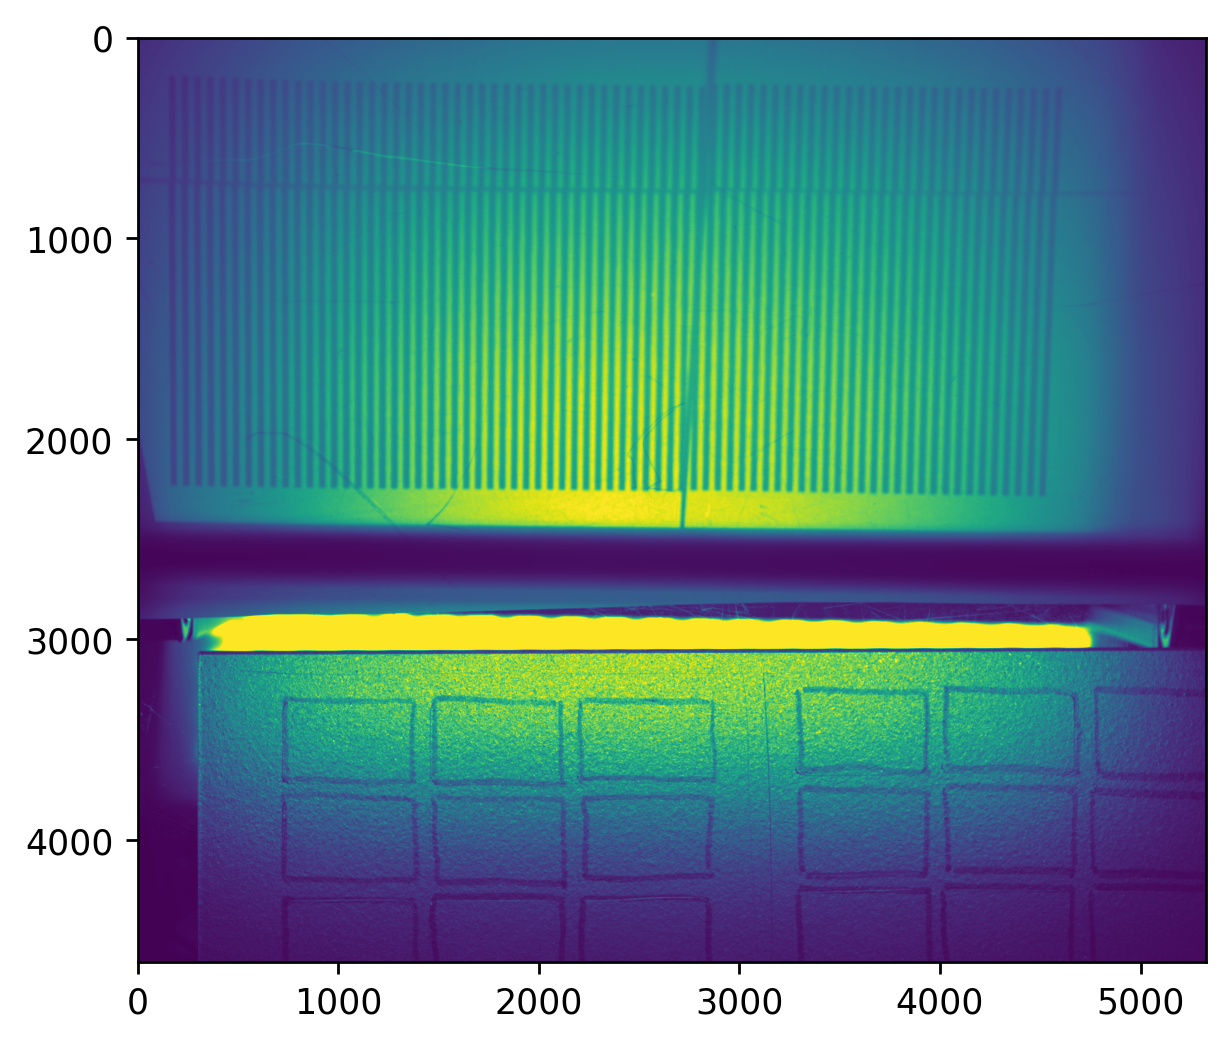

In [135]:
plt.figure(dpi=250)
plt.imshow(image)

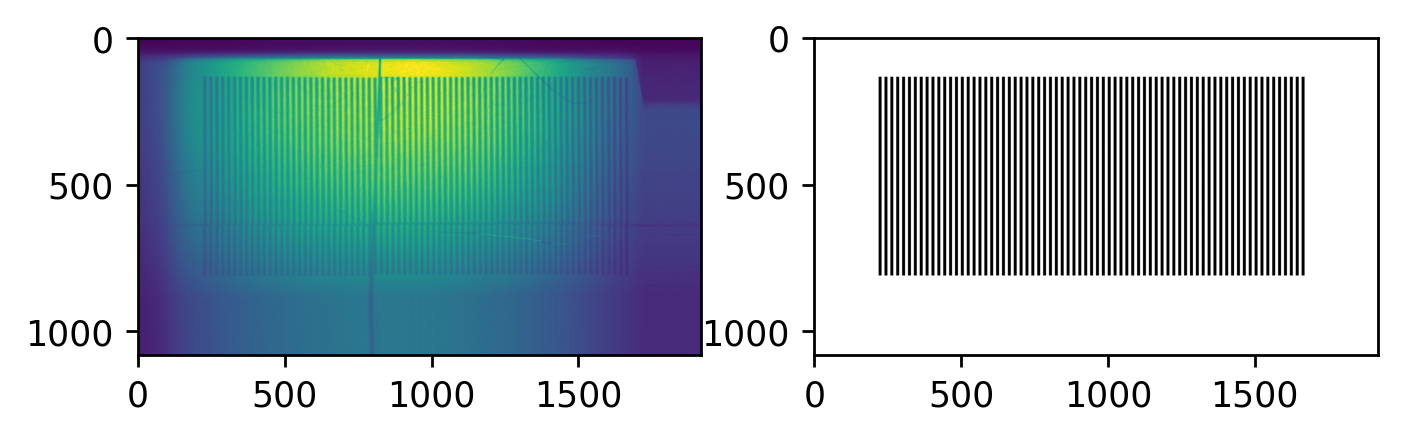

In [136]:
plt.figure(dpi=250)

plt.subplot(1,2,1)
plt.imshow(np.swapaxes(image_map, 0, 1))
plt.subplot(1,2,2)
plt.imshow(image_dmd)

In [170]:
desired_pattern = np.load('roi.npy')

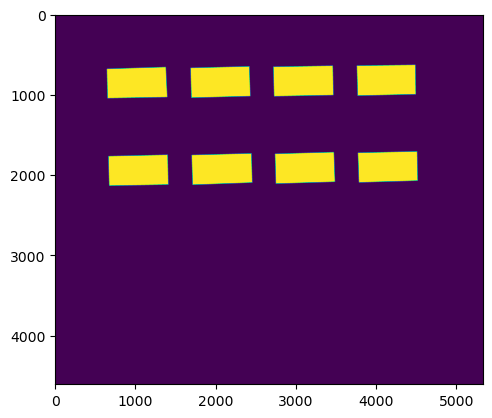

In [171]:
plt.imshow(desired_pattern)

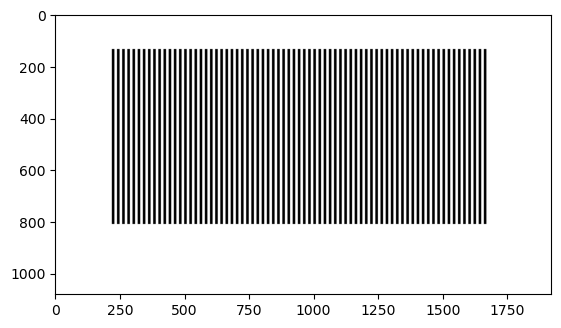

In [172]:
plt.imshow(image_dmd)

In [173]:
np.max(desired_pattern)

255.0

In [174]:
image_map = np.zeros((W, H), dtype = np.uint8)

In [175]:
image_map[x_grid.reshape(-1,), y_grid.reshape(-1,)] = desired_pattern[X_gird[1,:], X_gird[0,:]]

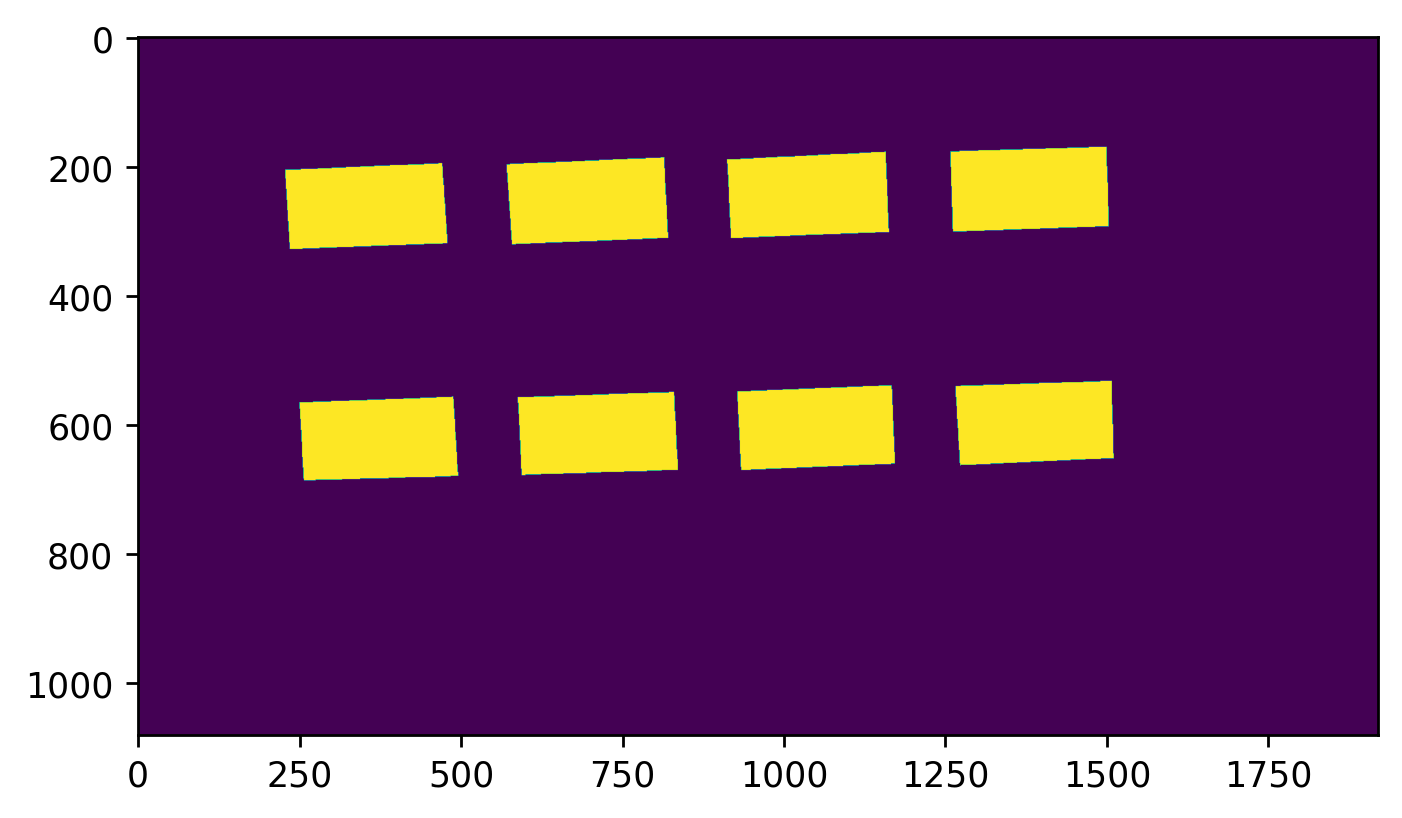

In [176]:
plt.figure(dpi=250)
plt.imshow(np.swapaxes(image_map, 0, 1))

In [177]:
np.save('roi_transform.npy', np.swapaxes(image_map, 0, 1))

In [178]:
np.save('image_dmd.npy', image_dmd)

In [179]:
image_dmd.shape

(1080, 1920, 3)

In [180]:
np.swapaxes(image_map, 0, 1).shape

(1080, 1920)